# CellType Prediction

I split out the last notebook into a class "CellTypePredictor" so I could automate much of this

In [15]:
import torch
torch.cuda.manual_seed(667)

In [16]:
from importlib import reload  ## reload for quick dev.
import pandas
import CellTypePredictor as ctp

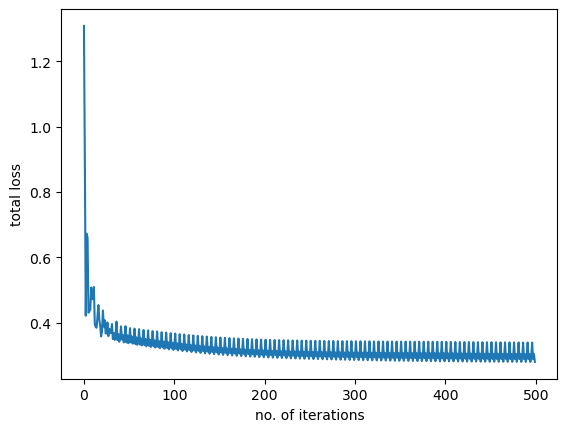

In [73]:
reload(ctp)
raw_dataset = pandas.read_csv("celltype_prediction_test.tsv.gz", delimiter="\t")
ctpred = ctp.CellTypePrediction(raw_dataset, "Celltype", 
                         ((2002,12), (12,8), (8,1)),
                         n_epochs=100, batch_size=500, multiclass=False, lossplot = True)

Let's make 2 pseudocells per output class, generated from 10 cells sampled with replacement in that output class

In [74]:
test_dataset = ctpred.makePseudoCells(nperclass=2, from_n=10) 
test_dataset

Created 26 pseudo cells from the averages of cells in the same output group


,nCount_RNA,nFeature_RNA,Apoa1,Rbp4,Ttr,Spink1,Apom,Apoe,Dkk1,Ctsl,...,Gpc6,Erbb2,Nptx2,0610012G03Rik,Lypd1,3110021N24Rik,Pdzd3,Efemp1,Foxa1,Ripply3
Epiblast,9443.0,2554.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Epiblast,12238.0,2933.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
Primitive Streak,8781.0,2431.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Primitive Streak,9061.0,2509.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
ExE endoderm,9050.0,2668.0,84.0,40.0,58.0,41.0,24.0,87.0,1.0,43.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
ExE endoderm,9180.0,2546.0,80.0,27.0,68.0,65.0,23.0,69.0,0.0,35.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
Visceral endoderm,9626.0,2756.0,33.0,8.0,31.0,64.0,11.0,55.0,5.0,16.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
Visceral endoderm,9071.0,2680.0,37.0,7.0,26.0,62.0,12.0,53.0,4.0,14.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
ExE ectoderm,18365.0,3641.0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
ExE ectoderm,16914.0,3399.0,0.0,0.0,0.0,1.0,0.0,14.0,0.0,4.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
ctpred.determineAccuracy()

Mean Accuracy: 0.4125301241874695


In [76]:
ctpred.doLabelPrediction(test_dataset)

{'score_perc': 7,
 'result':                            Pseudo                  Predicted
 0                        Epiblast                   Epiblast
 0                        Epiblast                   Epiblast
 0                Primitive Streak                   Epiblast
 0                Primitive Streak                   Epiblast
 0                    ExE endoderm           Primitive Streak
 0                    ExE endoderm           Primitive Streak
 0               Visceral endoderm               ExE endoderm
 0               Visceral endoderm               ExE endoderm
 0                    ExE ectoderm               ExE endoderm
 0                    ExE ectoderm          Visceral endoderm
 0                Nascent mesoderm          Visceral endoderm
 0                Nascent mesoderm               ExE ectoderm
 0       Anterior Primitive Streak          Visceral endoderm
 0       Anterior Primitive Streak               ExE ectoderm
 0                             PGC        

Not the greatest, let's play with the layers via a parameter search.

## Parameter Search

We'll change some layer parameters to see if we can improve that prediction score

In [82]:
from importlib import reload
import CellTypePredictor as ctp

reload(ctp)
raw_dataset = pandas.read_csv("celltype_prediction_test.tsv.gz", delimiter="\t")

# params -> prediction_data
store_pred = {}

def runOnce(layer, n_epochs, n_batch):
    ## Key for store_pred, ugly but it works
    key = str(layer) + "-" + str(n_epochs) + "-" + str(n_batch)
    if key in store_pred:
        print("Done already:", key)
        return(0)
    
    ctpred = ctp.CellTypePrediction(raw_dataset, "Celltype", layer, 
                                    n_epochs=n_epochs, batch_size=n_batch, multiclass=False, lossplot=False)
    test_dataset = ctpred.makePseudoCells(nperclass=2, from_n=10, message=False)
    mean_acc = ctpred.determineAccuracy(message=False)
    do_pred = ctpred.doLabelPrediction(test_dataset)

    store_pred[key] = [do_pred, mean_acc]
    

## Define some tests

In [48]:
## Layer Tests
layer_list = [
    ## Change first layer only
    ((2002,12), (12,8),(8,1)), ## default
    ((2002,100),(100,8),(8,1)),
    ((2002,1000),(1000,8),(8,1)),
    ## Change middle layer only
    ((2002,12),(12,100),(100,1)),
    ((2002,12),(12,200),(200,1)),
    ((2002,12),(12,1000),(1000,1)),
    ## Change both
    ((2002,1000),(1000,100),(100,1)),  ## down, down, down
    ((2002,100),(100,1000),(1000,1)),  ## down, up, down
    ((2002,5000),(5000,100),(100,1)),  ## up, down, down
    ((2002,3000),(3000,5000),(5000,1))## up, up, down
]

## Epoch Tests (epoch, batch) -- likely no change here if products are the same
epoch_list = [
    (100, 500), (500,100), (240,240), (50,1000), (10, 5000), (5000, 10)
]

Run (no need for multithreading, CUDA already chock full)

## Run Tests

In [49]:
for epoch, batch in epoch_list:
    print(epoch, batch, end=" -- ")
    for layer in layer_list:
        runOnce(layer, epoch, batch)
        print(layer, end="\r\t\t\t")
    print("")

			002, 3000), (3000, 5000), (5000, 1))41018676768639111328Finished epoch 0, latest loss 12.615384101867676Finished epoch 0, latest loss 12.615384101867676


KeyboardInterrupt: 

In [56]:
key_list = [x for x in store_pred.keys()]
key_list

['((2002, 12), (12, 8), (8, 1))-100-500',
 '((2002, 100), (100, 8), (8, 1))-100-500',
 '((2002, 1000), (1000, 8), (8, 1))-100-500',
 '((2002, 12), (12, 100), (100, 1))-100-500',
 '((2002, 12), (12, 200), (200, 1))-100-500',
 '((2002, 12), (12, 1000), (1000, 1))-100-500',
 '((2002, 1000), (1000, 100), (100, 1))-100-500',
 '((2002, 100), (100, 1000), (1000, 1))-100-500',
 '((2002, 5000), (5000, 100), (100, 1))-100-500',
 '((2002, 3000), (3000, 5000), (5000, 1))-100-500',
 '((2002, 12), (12, 8), (8, 1))-500-100',
 '((2002, 100), (100, 8), (8, 1))-500-100',
 '((2002, 1000), (1000, 8), (8, 1))-500-100',
 '((2002, 12), (12, 100), (100, 1))-500-100',
 '((2002, 12), (12, 200), (200, 1))-500-100',
 '((2002, 12), (12, 1000), (1000, 1))-500-100',
 '((2002, 1000), (1000, 100), (100, 1))-500-100',
 '((2002, 100), (100, 1000), (1000, 1))-500-100',
 '((2002, 5000), (5000, 100), (100, 1))-500-100']

In [62]:
[(key, store_pred[key]["score_perc"]) for key in key_list]

[('((2002, 12), (12, 8), (8, 1))-100-500', 11),
 ('((2002, 100), (100, 8), (8, 1))-100-500', 7),
 ('((2002, 1000), (1000, 8), (8, 1))-100-500', 7),
 ('((2002, 12), (12, 100), (100, 1))-100-500', 7),
 ('((2002, 12), (12, 200), (200, 1))-100-500', 7),
 ('((2002, 12), (12, 1000), (1000, 1))-100-500', 11),
 ('((2002, 1000), (1000, 100), (100, 1))-100-500', 7),
 ('((2002, 100), (100, 1000), (1000, 1))-100-500', 7),
 ('((2002, 5000), (5000, 100), (100, 1))-100-500', 7),
 ('((2002, 3000), (3000, 5000), (5000, 1))-100-500', 7),
 ('((2002, 12), (12, 8), (8, 1))-500-100', 7),
 ('((2002, 100), (100, 8), (8, 1))-500-100', 19),
 ('((2002, 1000), (1000, 8), (8, 1))-500-100', 7),
 ('((2002, 12), (12, 100), (100, 1))-500-100', 7),
 ('((2002, 12), (12, 200), (200, 1))-500-100', 15),
 ('((2002, 12), (12, 1000), (1000, 1))-500-100', 15),
 ('((2002, 1000), (1000, 100), (100, 1))-500-100', 7),
 ('((2002, 100), (100, 1000), (1000, 1))-500-100', 7),
 ('((2002, 5000), (5000, 100), (100, 1))-500-100', 7)]

Highest prediction score is 19, for a layer of 2002 → 12 → 8 → 1, and with an epoch of 500 and 100 batches.

### Thoughts

A longer epoch training period yielded better results, and extreme layer values were not fruitful.

## Next: Let's try more layers with some defaults

In [68]:
## Layer Tests
layer_list = [
    ((2002,12), (12,8),(8,1)), ## default
    ((2002,100),(100,12),(12,1)),
    ((2002,500),(500,500),(500,1)),
    ((2002,200),(200,20),(20,1)),
    ((2002,1000),(1000,10),(10,1))
]

## Epoch Tests (epoch, batch) -- likely no change here if products are the same
epoch_list = [
    (500, 100), (500,500), (1000,100), (1000,100)
]

In [69]:
for epoch, batch in epoch_list:
    for layer in layer_list:
        print(epoch, batch, layer)
        runOnce(layer, epoch, batch)
    

500 100 ((2002, 12), (12, 8), (8, 1))
500 100 ((2002, 100), (100, 12), (12, 1))4810829164
500 100 ((2002, 500), (500, 500), (500, 1))49870344
500 100 ((2002, 200), (200, 20), (20, 1))101867676
500 100 ((2002, 1000), (1000, 10), (10, 1))93487554
500 500 ((2002, 12), (12, 8), (8, 1))48509430885315
500 500 ((2002, 100), (100, 12), (12, 1))3272285466
500 500 ((2002, 500), (500, 500), (500, 1))41525274
500 500 ((2002, 200), (200, 20), (20, 1))101867676
500 500 ((2002, 1000), (1000, 10), (10, 1))19966125
1000 100 ((2002, 12), (12, 8), (8, 1))2888765335083
1000 100 ((2002, 100), (100, 12), (12, 1))043609626
1000 100 ((2002, 500), (500, 500), (500, 1))4716797
1000 100 ((2002, 200), (200, 20), (20, 1))01867676
1000 100 ((2002, 1000), (1000, 10), (10, 1))875488
1000 100 ((2002, 12), (12, 8), (8, 1))61303710938
Done already: ((2002, 12), (12, 8), (8, 1))-1000-100
1000 100 ((2002, 100), (100, 12), (12, 1))
Done already: ((2002, 100), (100, 12), (12, 1))-1000-100
1000 100 ((2002, 500), (500, 500), 

In [71]:
key_list = [x for x in store_pred.keys()]
[(key, store_pred[key]["score_perc"]) for key in key_list]

[('((2002, 12), (12, 8), (8, 1))-500-100', 7),
 ('((2002, 100), (100, 12), (12, 1))-500-100', 15),
 ('((2002, 500), (500, 500), (500, 1))-500-100', 7),
 ('((2002, 200), (200, 20), (20, 1))-500-100', 34),
 ('((2002, 1000), (1000, 10), (10, 1))-500-100', 42),
 ('((2002, 12), (12, 8), (8, 1))-500-500', 11),
 ('((2002, 100), (100, 12), (12, 1))-500-500', 7),
 ('((2002, 500), (500, 500), (500, 1))-500-500', 7),
 ('((2002, 200), (200, 20), (20, 1))-500-500', 30),
 ('((2002, 1000), (1000, 10), (10, 1))-500-500', 7),
 ('((2002, 12), (12, 8), (8, 1))-1000-100', 11),
 ('((2002, 100), (100, 12), (12, 1))-1000-100', 7),
 ('((2002, 500), (500, 500), (500, 1))-1000-100', 7),
 ('((2002, 200), (200, 20), (20, 1))-1000-100', 7),
 ('((2002, 1000), (1000, 10), (10, 1))-1000-100', 7)]

Up to 42%, a marked increase:

In [78]:
store_pred['((2002, 1000), (1000, 10), (10, 1))-500-100']

{'score_perc': 42,
 'result':    Pseudo  Predicted
 0       0          0
 0       0          0
 0       1          0
 0       1          0
 0       2          2
 0       2          2
 0       3          2
 0       3          2
 0       4          4
 0       4          3
 0       5          4
 0       5          4
 0       6          5
 0       6          5
 0       7          6
 0       7          6
 0       8          7
 0       8          8
 0       9          6
 0       9         10
 0      10         10
 0      10         10
 0      11         11
 0      11         11
 0      12         11
 0      12         12}

**Thoughts** 10:1 scaling between layers really seems to be the trick, and 500 epochs with 100 batches seems to also work well

## Further Refinement

smaller batches, other 10:1 tests

In [84]:
store_pred = {}
## Layer Tests
layer_list = [
    ##((2002,5000),(5000,50),(50,1)),## Avg. Loss of 80
    ##((2002,2000),(2000,100),(100,1)), ## Avg. Loss of 20
    ((2002,200),(200,20),(20,1)),
    ((2002,500),(500,50),(50,1)),
    ((2002,10),(10,5),(5,1)),
    ((2002,1000),(1000,10),(10,1))
]
epoch_list = [
    (500, 100), 
    (500,10),  ## Avg. loss of 27
    (500,1),   ## Avg. loss of 0?
]
for epoch, batch in epoch_list:
    for layer in layer_list:
        print(epoch, batch, layer)
        runOnce(layer, epoch, batch)

500 100 ((2002, 200), (200, 20), (20, 1))
500 100 ((2002, 500), (500, 50), (50, 1))2081413276
500 100 ((2002, 10), (10, 5), (5, 1))5384101867676
500 100 ((2002, 1000), (1000, 10), (10, 1))78640747
500 10 ((2002, 200), (200, 20), (20, 1))7901611328
500 10 ((2002, 500), (500, 50), (50, 1))4626960754
500 10 ((2002, 10), (10, 5), (5, 1))92310333251953
500 10 ((2002, 1000), (1000, 10), (10, 1))49339294
500 1 ((2002, 200), (200, 20), (20, 1))41934585571
500 1 ((2002, 500), (500, 50), (50, 1))
500 1 ((2002, 10), (10, 5), (5, 1))
500 1 ((2002, 1000), (1000, 10), (10, 1))178768158


In [95]:
key_list = [x for x in store_pred.keys()]
[(key, store_pred[key][0]["score_perc"]) for key in key_list]

[('((2002, 200), (200, 20), (20, 1))-500-100', 30),
 ('((2002, 500), (500, 50), (50, 1))-500-100', 7),
 ('((2002, 10), (10, 5), (5, 1))-500-100', 15),
 ('((2002, 1000), (1000, 10), (10, 1))-500-100', 7),
 ('((2002, 200), (200, 20), (20, 1))-500-10', 73),
 ('((2002, 500), (500, 50), (50, 1))-500-10', 7),
 ('((2002, 10), (10, 5), (5, 1))-500-10', 19),
 ('((2002, 1000), (1000, 10), (10, 1))-500-10', 7),
 ('((2002, 200), (200, 20), (20, 1))-500-1', 7),
 ('((2002, 500), (500, 50), (50, 1))-500-1', 7),
 ('((2002, 10), (10, 5), (5, 1))-500-1', 7),
 ('((2002, 1000), (1000, 10), (10, 1))-500-1', 7)]

73% accuracy!, 2000 → 200 → 20 → 1, using 500 epochs and batches of 10.

In [96]:
key = "((2002, 200), (200, 20), (20, 1))-500-10"
store_pred[key]

[{'score_perc': 73,
  'result':   Pseudo Predicted
  0      0         0
  0      0         0
  0      1         1
  0      1         0
  0      2         2
  0      2         2
  0      3         2
  0      3         2
  0      4         4
  0      4         4
  0      5         5
  0      5         5
  0      6         6
  0      6         6
  0      7         7
  0      7         7
  0      8         8
  0      8         8
  0      9         9
  0      9        10
  0     10         9
  0     10        10
  0     11        10
  0     11        10
  0     12        12
  0     12        12},
 0.4125301241874695]

In [ ]:
from importlib import reload
import pandas
import CellTypePredictor as ctp

reload(ctp)
raw_dataset = pandas.read_csv("celltype_prediction_test.tsv.gz", delimiter="\t")
ctpred = ctp.CellTypePrediction(
    raw_dataset, "Celltype", ((2002,1000),(1000,200),(200,20),(20,1)),
    n_epochs=500, batch_size=10, multiclass=False, seed = 42)
ctpred.model.eval()
mean_acc = ctpred.determineAccuracy(message=True)

In [144]:
test_dataset = ctpred.makePseudoCells(nperclass=2, from_n=11)
do_pred = ctpred.doLabelPrediction(test_dataset)
do_pred

Created 26 pseudo cells from the averages of cells in the same output group


{'score_perc': 23,
 'result':                            Pseudo                       Predicted
 0                        Epiblast                        Epiblast
 0                        Epiblast                        Epiblast
 0                Primitive Streak                        Epiblast
 0                Primitive Streak                        Epiblast
 0                    ExE endoderm                Primitive Streak
 0                    ExE endoderm                Primitive Streak
 0               Visceral endoderm                    ExE endoderm
 0               Visceral endoderm                    ExE endoderm
 0                    ExE ectoderm               Visceral endoderm
 0                    ExE ectoderm               Visceral endoderm
 0                Nascent mesoderm                    ExE ectoderm
 0                Nascent mesoderm                    ExE ectoderm
 0       Anterior Primitive Streak                Nascent mesoderm
 0       Anterior Primitive Strea